In [2]:
# Import all required libraries

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read using pandas

In [3]:
#import titanic data files

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/Census_Income.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,educationNum,occupation,relationship,race,sex,capitalGain,capitalLoss,HrsPerWeek,nativeCountry,maritalstatus,IncomePerYear
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Husband,White,Male,0,0,13,United-States,2,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,3,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,2,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,2,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   workclass      32561 non-null  object
 2   fnlwgt         32561 non-null  int64 
 3   education      32561 non-null  object
 4   educationNum   32561 non-null  int64 
 5   occupation     32561 non-null  object
 6   relationship   32561 non-null  object
 7   race           32561 non-null  object
 8   sex            32561 non-null  object
 9   capitalGain    32561 non-null  int64 
 10  capitalLoss    32561 non-null  int64 
 11  HrsPerWeek     32561 non-null  int64 
 12  nativeCountry  32561 non-null  object
 13  maritalstatus  32561 non-null  int64 
 14  IncomePerYear  32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['age','workclass','fnlwgt','education','educationNum','occupation','relationship','race','sex','capitalGain','capitalLoss','nativeCountry','maritalstatus','IncomePerYear']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            32561 non-null  int64
 1   workclass      32561 non-null  int32
 2   fnlwgt         32561 non-null  int64
 3   education      32561 non-null  int32
 4   educationNum   32561 non-null  int64
 5   occupation     32561 non-null  int32
 6   relationship   32561 non-null  int32
 7   race           32561 non-null  int32
 8   sex            32561 non-null  int32
 9   capitalGain    32561 non-null  int64
 10  capitalLoss    32561 non-null  int64
 11  HrsPerWeek     32561 non-null  int64
 12  nativeCountry  32561 non-null  int32
 13  maritalstatus  32561 non-null  int64
 14  IncomePerYear  32561 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [8]:
df.shape

(32561, 15)

# Statistical Data Analysis - 

In [9]:
df.describe()

,age,workclass,fnlwgt,education,educationNum,occupation,relationship,race,sex,capitalGain,capitalLoss,HrsPerWeek,nativeCountry,maritalstatus,IncomePerYear
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,21.580326,3.376371,10498.892479,10.298210,9.080679,6.421762,1.446362,3.665858,0.669205,6.501213,2.053285,40.437456,36.470870,1.083781,0.240810
std,13.635502,1.582038,6048.972814,3.870264,2.572720,4.328619,1.606771,0.848806,0.470506,23.300287,10.056564,12.347429,6.083092,1.251381,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,5396.000000,9.000000,8.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000,0.000000
50%,20.000000,3.000000,10348.000000,11.000000,9.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,1.000000,0.000000
75%,31.000000,3.000000,15487.000000,12.000000,11.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,1.000000,0.000000
max,72.000000,8.000000,21647.000000,15.000000,15.000000,14.000000,5.000000,4.000000,1.000000,118.000000,91.000000,99.000000,41.000000,6.000000,1.000000


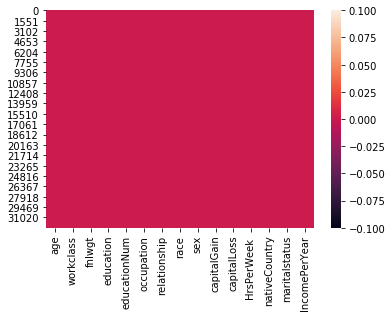

In [10]:
# check missing values
sns.heatmap(df.isnull()) 

# EDA Process For Data Analysis-

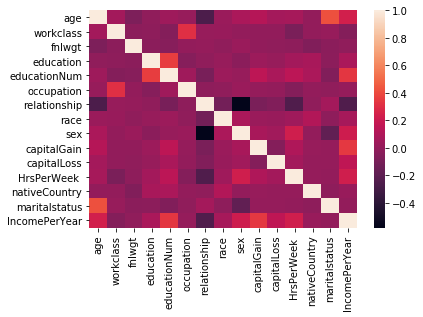

In [11]:
# checking correlation
dfcor=df.corr()
sns.heatmap(dfcor)

Only education & educationNum have slite correlation ,other columns dont have any correlation

In [12]:
# class distribution of target 
print(df.groupby('IncomePerYear').size())

IncomePerYear
0    24720
1     7841
dtype: int64


Person earning income less than equals to 50K is 76% & earning income more than 50K is 25% 

In [13]:
# Checking for skewness for each of the column
df.skew()

age              0.555588
workclass        1.167150
fnlwgt           0.063101
education       -0.934042
educationNum    -0.311676
occupation       0.126728
relationship     0.786818
race            -2.435386
sex             -0.719293
capitalGain      3.572079
capitalLoss      5.266147
HrsPerWeek       0.227643
nativeCountry   -4.205965
maritalstatus    2.155796
IncomePerYear    1.212430
dtype: float64

In [14]:
# Check for the outliers,apply zscore & remove skewness

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(32561, 15)
(26256, 15)


In [15]:
# Separating target & input variables
import numpy as np

df_x=df_final.drop(columns=["IncomePerYear"])
y=df_final[["IncomePerYear"]]

In [16]:
# scalling the input variable
# linear regression algorith requires all feature to be on common scale

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [17]:
# lets again check for skewness
x.skew()

age              0.510872
workclass        1.208253
fnlwgt           0.035829
education       -0.952997
educationNum    -0.149018
occupation       0.143026
relationship     0.733216
race            -2.533769
sex             -0.730363
capitalGain      6.047308
capitalLoss      9.676872
HrsPerWeek      -0.340333
nativeCountry   -5.020260
maritalstatus    1.295394
dtype: float64

Column with skewness are capitalGain,capitalLoss ,workclass,maritalstatus               

# Analyse the data set stats using plots

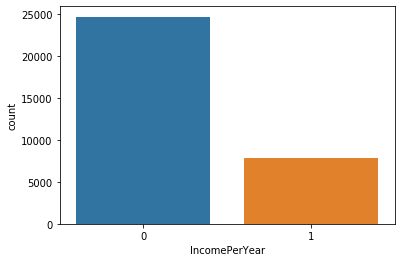

In [18]:
sns.countplot(x='IncomePerYear', data=df);

# Visualization-Univariate

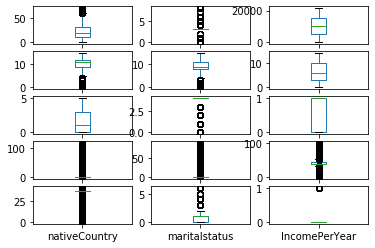

In [19]:
# Visualization - box and whisker plots
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False)
plt.show()

column workclass,race,maritalstatus showing outliers

In [20]:
import pandas as pd
X = df[['age','workclass','fnlwgt','education','educationNum','occupation','relationship','race','sex','capitalGain','capitalLoss','nativeCountry','maritalstatus']]
y = df.IncomePerYear        # y is a vector, hence we use dot to access 'label'

In [21]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(32561, 13)


In [22]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(32561,)


In [23]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.8119395651639848


In [26]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8029232940258071

In [27]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.806880 (0.004067)
LDA: 0.816339 (0.004949)
KNN: 0.767445 (0.007518)
CART: 0.806839 (0.007573)
NB: 0.811998 (0.005592)


# Apply Classification Models- SVM,SVC,KNN,Descision Tree

In [ ]:
import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,X,y,cv=20,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=20)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

In [ ]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=30,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=30)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

In [ ]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=30)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

In [ ]:
svrbf=SVC(kernel='rbf') 
score=cross_val_score(svrbf,X,y,cv=20)
print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())
y_pred = cross_val_predict(svrbf, X, y, cv=20)
print('Y prediction values')
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

In [ ]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score=cross_val_score(knn,X,y,cv=30,scoring='accuracy')

print(score)

Conclusion-For this dataset GaussianNB is gi8ving best score